In [11]:
import Part1, Part2, Part4
import tools
Data_Highway = tools.read_trajectories("../data/energy.csv")
data = tools.reconstruct(Data_Highway)

## Part 4

Path Visualization before and after aggregation

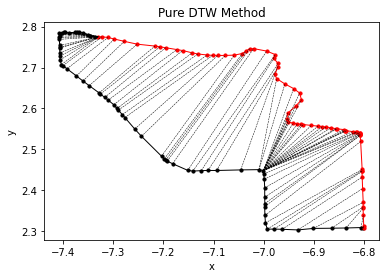

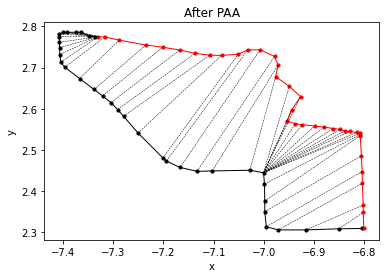

In [12]:
T1 = data[0]
T2 = data[1]
_a, b = Part1.dtw(T1, T2)
c = 2 # aggregate factor
T3 = Part4.paa(T1, c)
T4 = Part4.paa(T2, c)
_c, d = Part1.dtw(T3, T4)
tools.draw_assignment(T1, T2, b, 'Pure DTW Method', '../images/part4/beforePAA')
tools.draw_assignment(T3, T4, d, 'After PAA', '../images/part4/afterPAA')

### Time difference between dtw and pdtw

In [13]:
import Part1, Part4
import tools
import time
Data_Highway = tools.read_trajectories("../data/highway.csv")
tracjtories = tools.reconstruct(Data_Highway)

first = time.time()
c = 2   # aggregate factor
for id in range(1, len(tracjtories)):
    T1 = Part4.paa(tracjtories[id-1], c)
    T2 = Part4.paa(tracjtories[id], c)
    a, b = Part1.dtw(T1, T2)
    
print("Time for pdtw with c=2:", time.time()-first)

first = time.time()
c = 5  
for id in range(1, len(tracjtories)):
    T1 = Part4.paa(tracjtories[id-1], c)
    T2 = Part4.paa(tracjtories[id], c)
    a, b = Part1.dtw(T1, T2)
    
print("Time for pdtw with c=5:", time.time()-first)

first = time.time()
for id in range(1, len(tracjtories)):
    T1 = tracjtories[id-1]
    T2 = tracjtories[id]
    a, b = Part1.dtw(T1, T2)
print("Time for dtw:", time.time()-first)

Time for pdtw with c=2: 0.7642590999603271
Time for pdtw with c=5: 0.30853724479675293
Time for dtw: 2.3171823024749756
